In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

In [11]:
# df = pd.read_csv('derivativesData/Total_house_and_water_heater.csv', sep=';')
df = pd.read_csv('derivativesData/102.402.000045_2022.csv',sep=';')
df['ts'] = df['Date']+' '+df['Time (UTC)']
df = df[['Active Power L1 (W)','Apparent Power L1 (VA)','ts']]
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S:%f')
df.set_index('ts', inplace=True)
df.columns=['pwrA','apwrA']
df['pwrA'] = df['pwrA'].astype(float)
df['apwrA'] = df['apwrA'].astype(float)

df = df.resample('50ms').mean()
# df['pwrA'] = df['pwrA'].fillna(method='ffill')

df = df.dropna()
df['dif'] = df.index.to_series().diff().astype('timedelta64[ms]')
df = df.loc[(df['dif'].shift(-2)<=60) | (df['dif'].shift()<=60)]


# conditions = [
#     (df['apwrA'] > df['pwrA']),
#     (df['apwrA'] < df['pwrA'])]
# choices = [np.sqrt(df['apwrA']**2-df['pwrA']**2), - np.sqrt(np.abs(df['apwrA']**2-df['pwrA']**2))]
# df['rpwrA'] = np.select(conditions, choices)
# df['rpwrA'] =np.sqrt(np.abs(df['apwrA']**2-df['pwrA']**2))
# df.drop('apwrA', axis=1, inplace=True)
# df = df.iloc[:5000]
print(df.head())
print(df.tail())

                                pwrA        apwrA      dif
ts                                                        
2022-05-18 21:12:42.850    72.853584    85.615273  60000.0
2022-05-18 21:13:09.750   209.739502   219.366745  26900.0
2022-05-18 21:13:09.800   637.412903   655.861328     50.0
2022-05-18 21:13:09.850  1009.875122  1024.517456     50.0
2022-05-18 21:13:09.900  1244.421631  1279.527466     50.0
                              pwrA      apwrA      dif
ts                                                    
2022-05-20 14:22:20.750  59.062000  82.749489     50.0
2022-05-20 14:22:20.800  59.062000  82.794266     50.0
2022-05-20 14:22:20.850  59.017223  82.749489     50.0
2022-05-20 14:22:20.900  59.017223  82.704712     50.0
2022-05-20 14:23:20.900  58.614223  82.480820  60000.0


<AxesSubplot:xlabel='ts'>

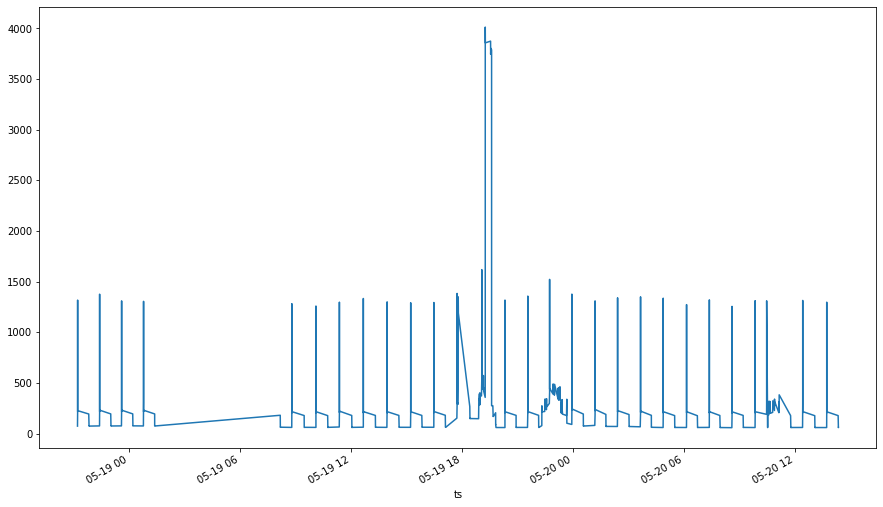

In [18]:
# df = df.loc['2021-07-25 00:00:00.000':'2021-07-25 23:00:00.000']
# df = df.loc['2021-07-24 16:51:00.000':'2021-07-24 18:00:00.000']
# df = df.loc['2022-05-18 21:00:00.000':'2022-05-19 06:00:00.000']
df['pwrA'].plot(figsize=[15,9])


In [13]:
########################
# Run dataframe row by row to identify start of each event
#########################
ind=0
df['ind'] = np.nan
event = 0

for i in range(0, int(df.shape[0]-2)):
    if  event==0:
        # start of event
#         if df['dif'].iloc[i+2]<=60:
        if (df['dif'].iloc[i]>100 and df['dif'].iloc[i+1]>100 and df['dif'].iloc[i+2]<=100):
            event=1
            df['ind'].iloc[i] = int(ind)
            
    elif event==1:
        # end of event
        if (df['dif'].iloc[i]>100 and df['dif'].iloc[i-1]<100):
            df['ind'].iloc[i] = int(ind)
            event = 0
            ind += 1
        else:
            df['ind'].iloc[i] = int(ind)
df = df.dropna()

In [14]:
for name, tmp1 in df.groupby('ind'):
    print(tmp1.shape)
    

(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(125, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(53, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(63, 4)
(61, 4)


fridge  21:13
fridge  21:13
fridge  22:24
fridge  22:24
fridge  23:35
fridge  23:35
fridge  0:47
fridge  0:47
fridge  8:48
fridge  10:6
fridge  10:6
fridge  11:22
fridge  12:40
fridge  12:40
fridge  13:57
fridge  13:57
fridge  15:14
fridge  15:14
fridge  16:29
fridge  16:29
fridge  17:44
fridge  17:44
fridge  19:4
fridge  20:20
fridge  20:20
fridge  21:34
fridge  21:34
fridge  22:44
fridge  23:57
fridge  23:57
fridge  1:12
fridge  2:25
fridge  3:40
fridge  4:53
fridge  4:53
fridge  6:9
fridge  7:23
fridge  7:23
fridge  8:37
fridge  9:52
fridge  12:26
fridge  12:26
fridge  13:44


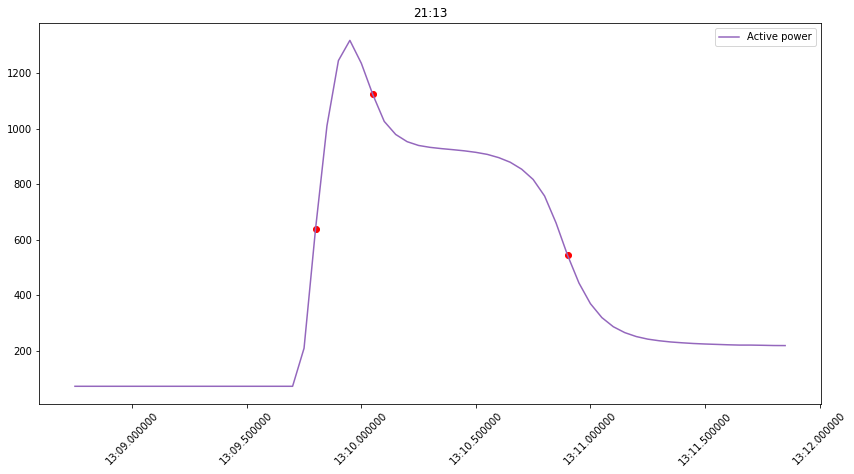

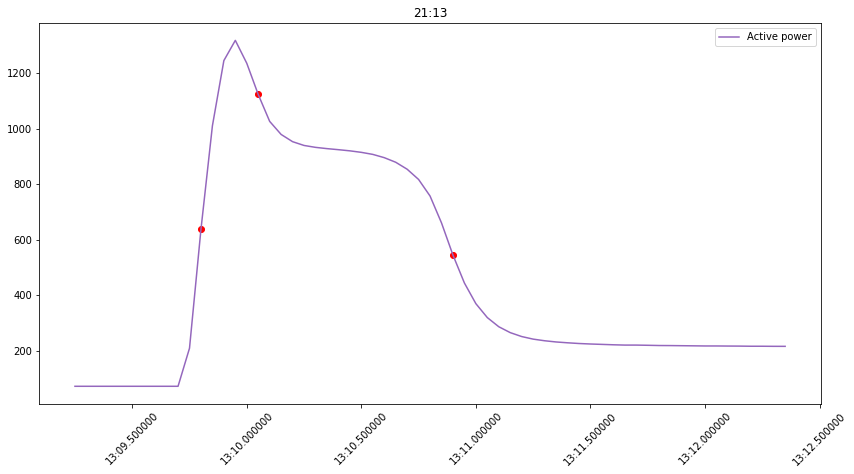

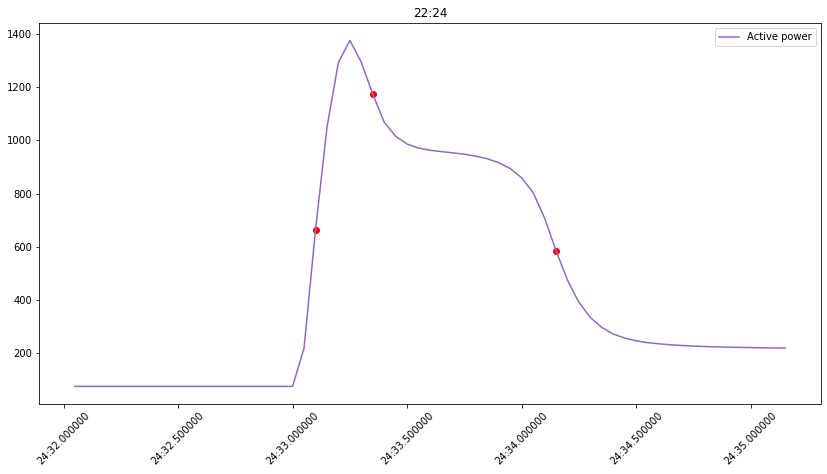

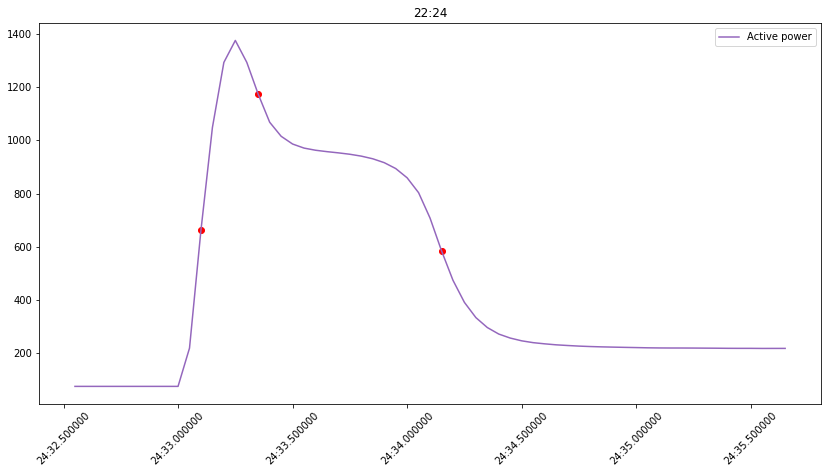

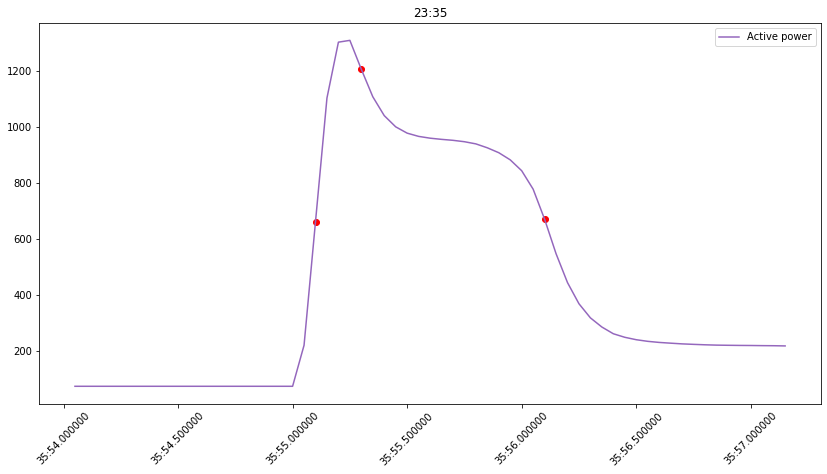

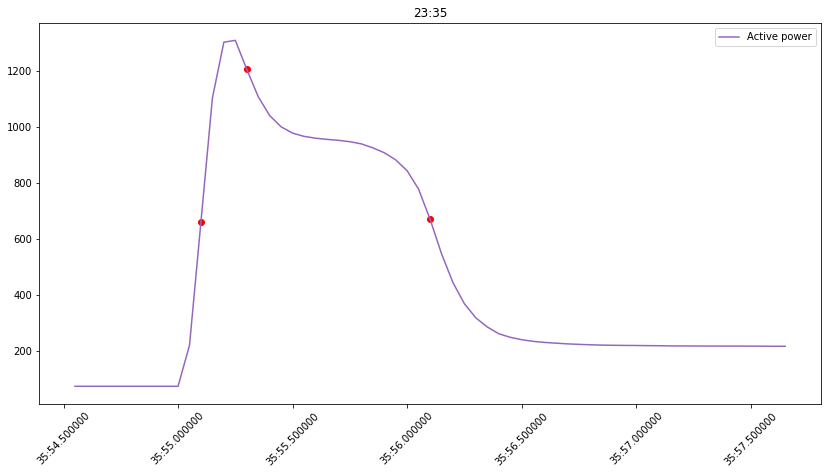

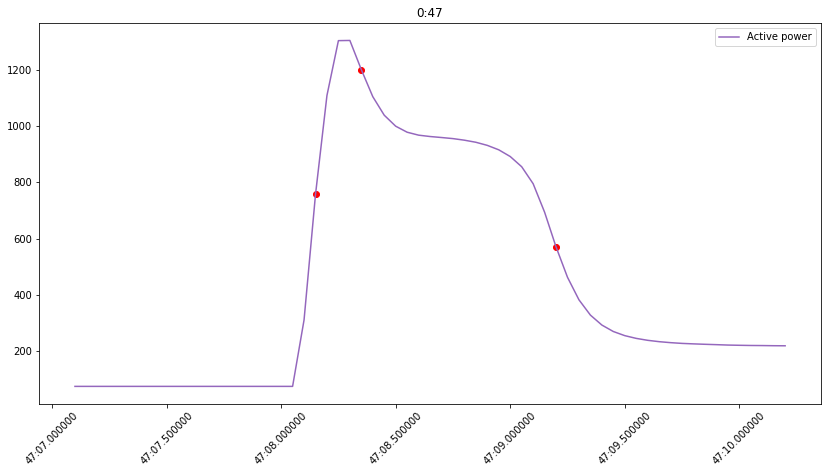

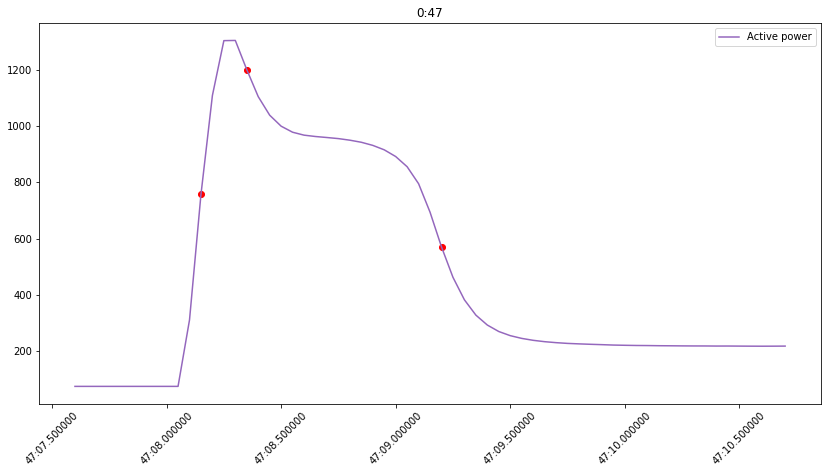

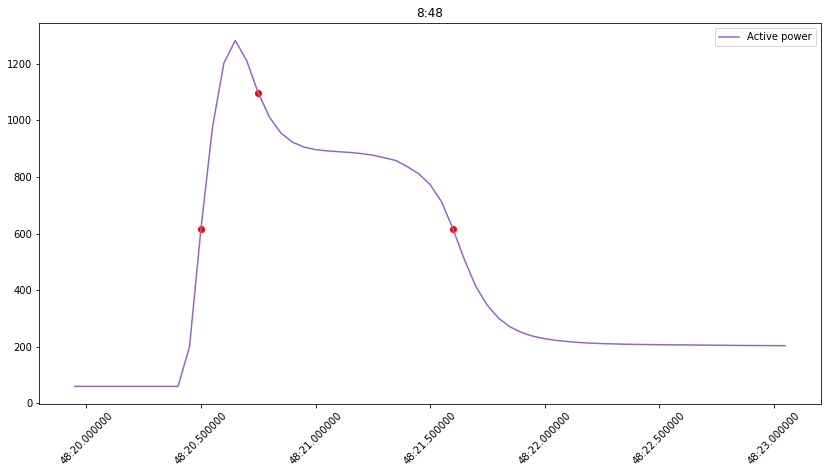

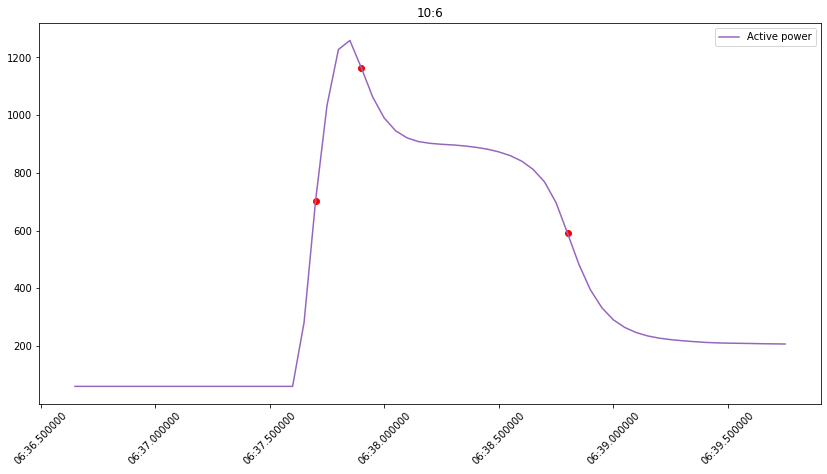

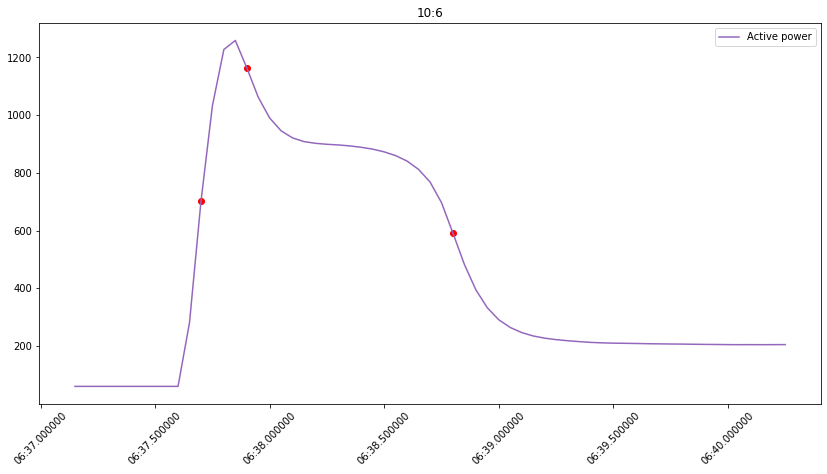

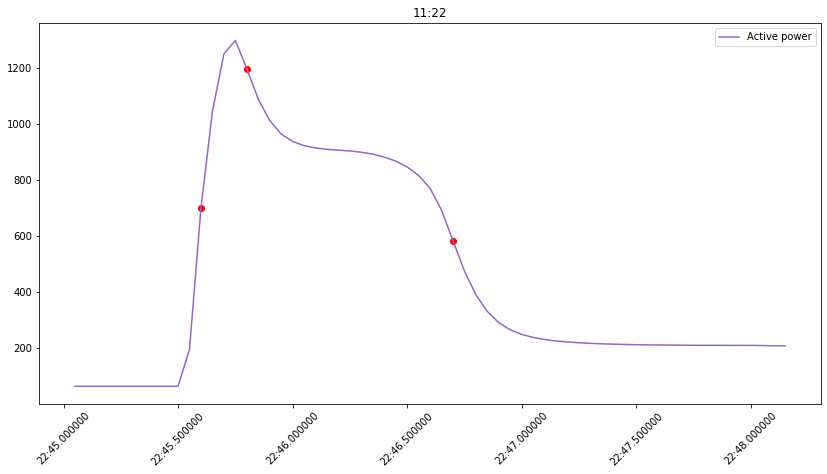

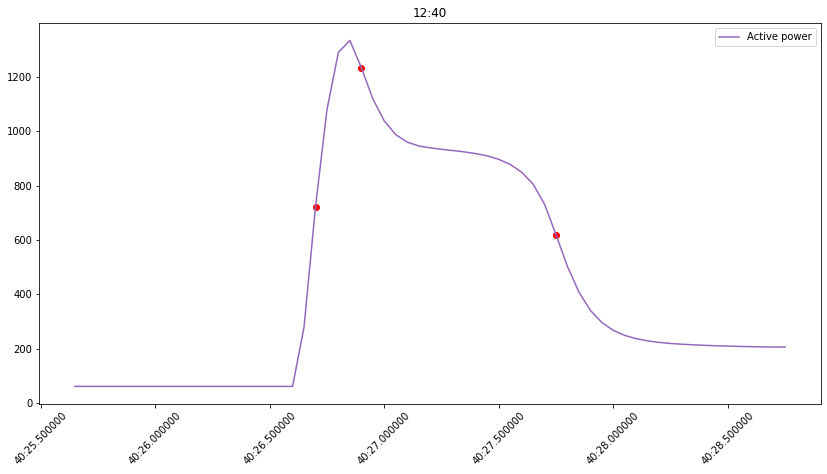

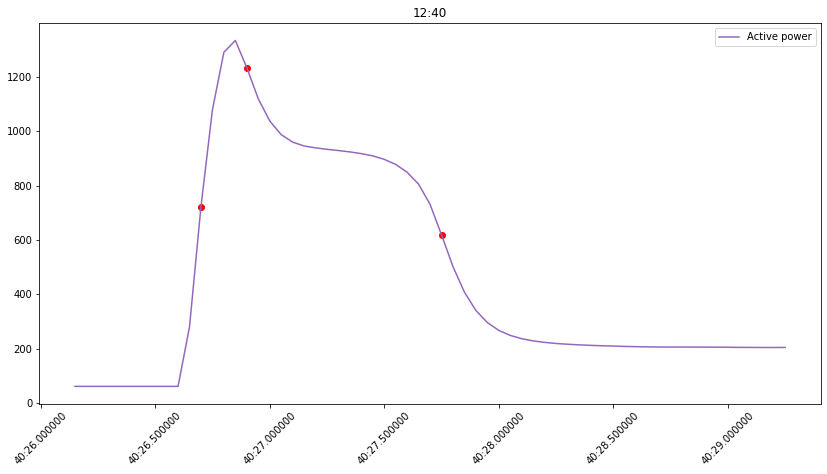

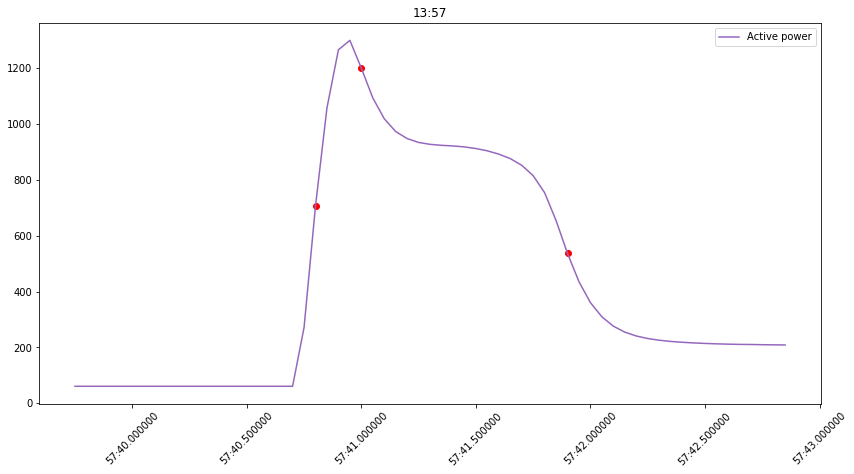

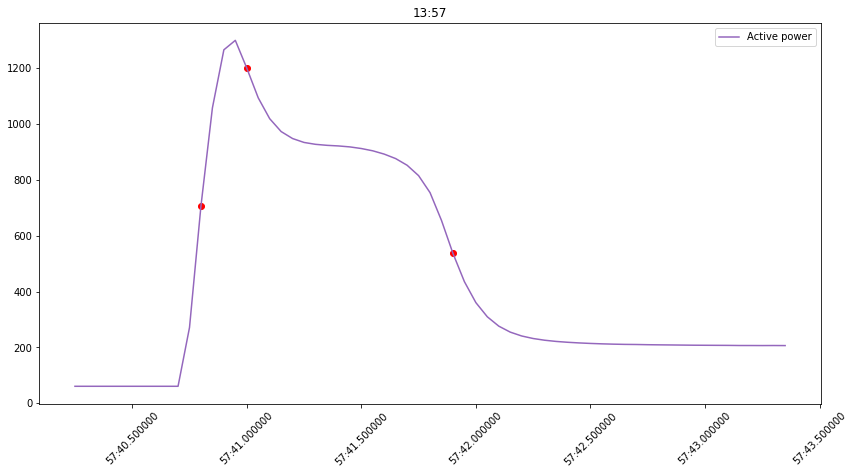

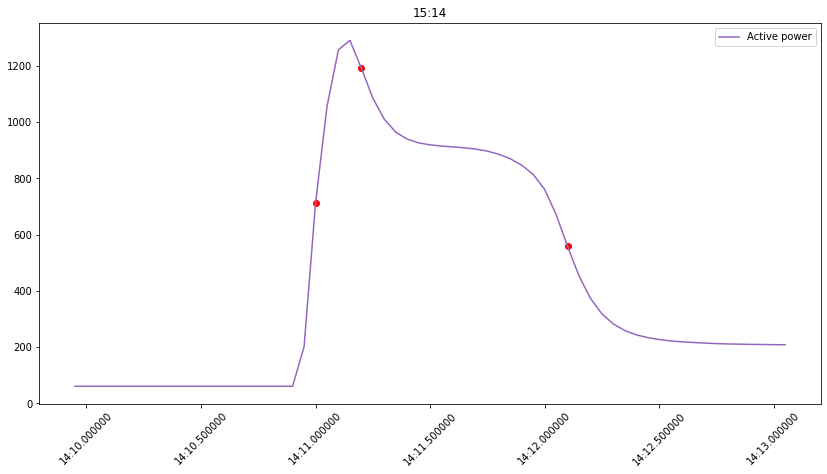

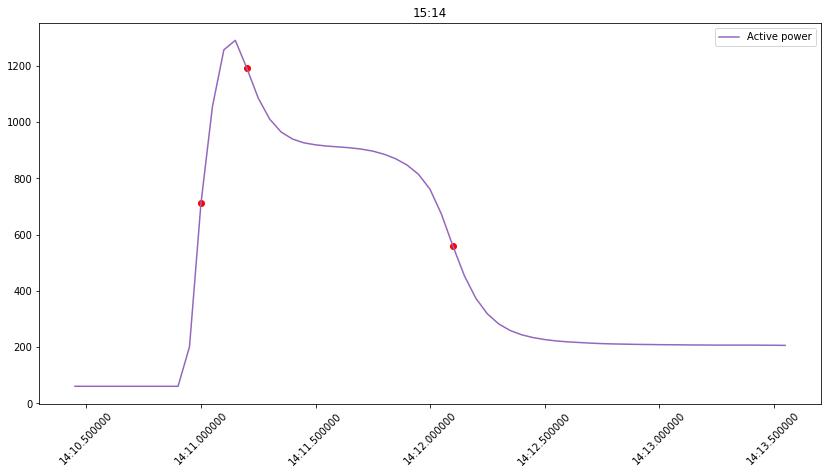

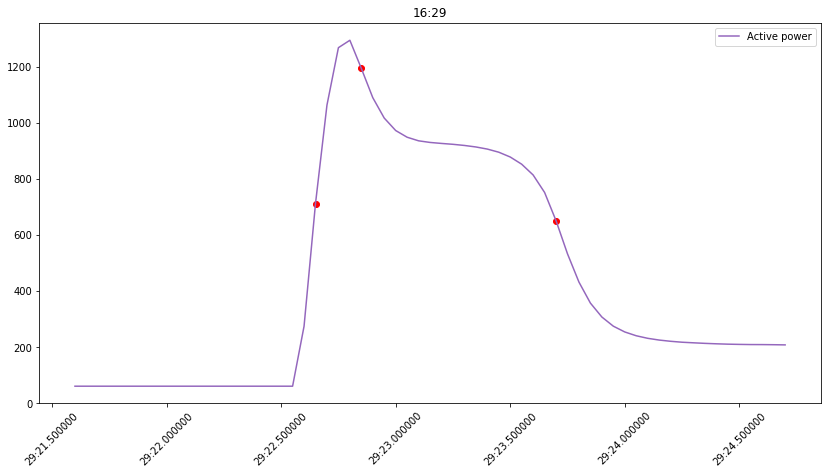

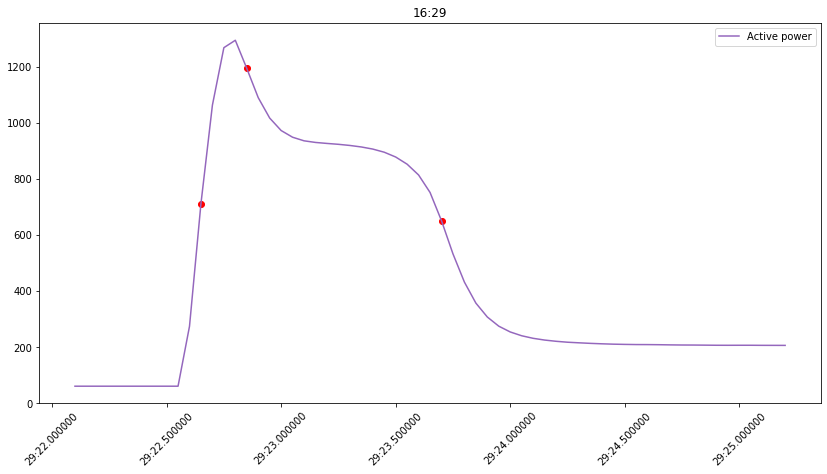

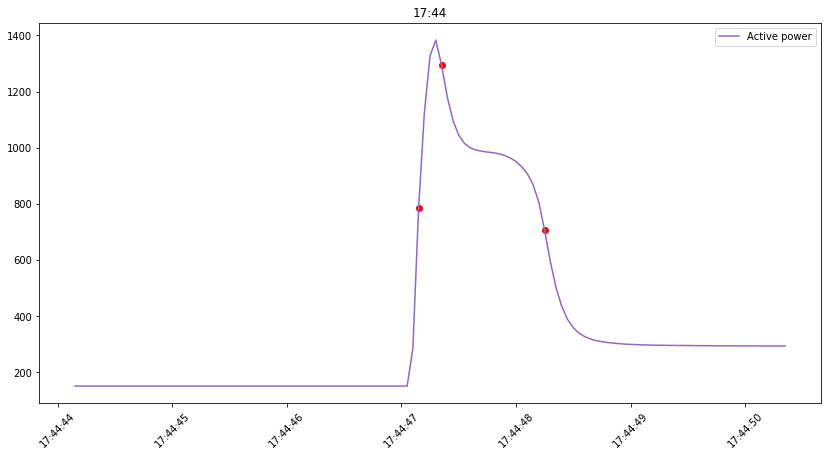

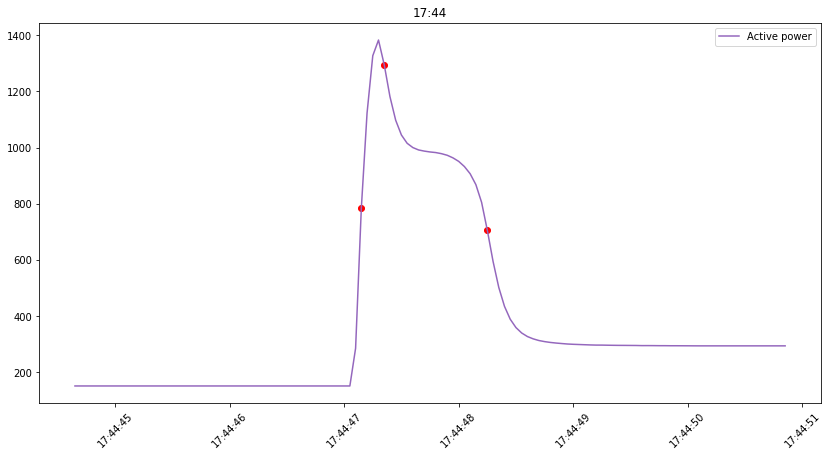

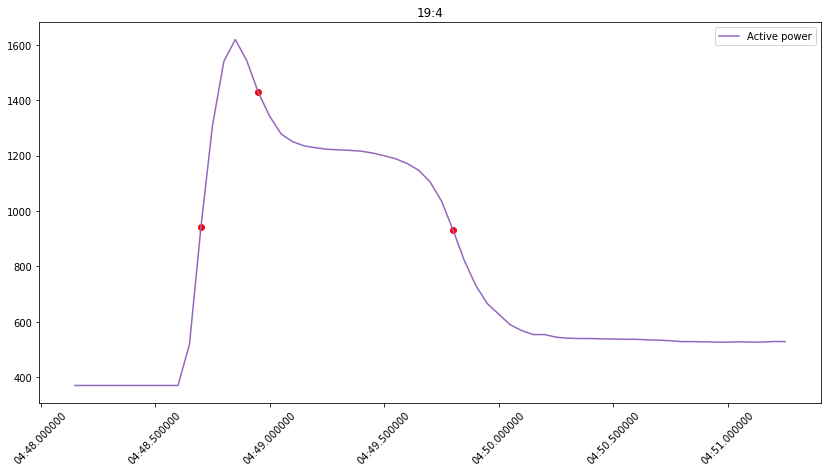

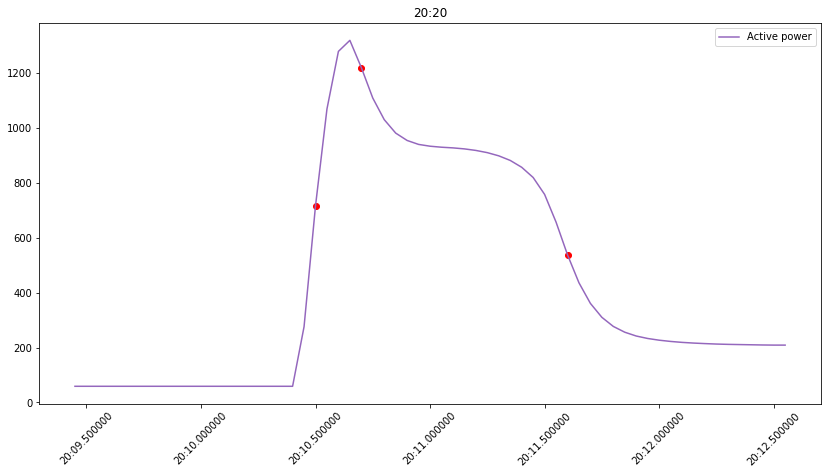

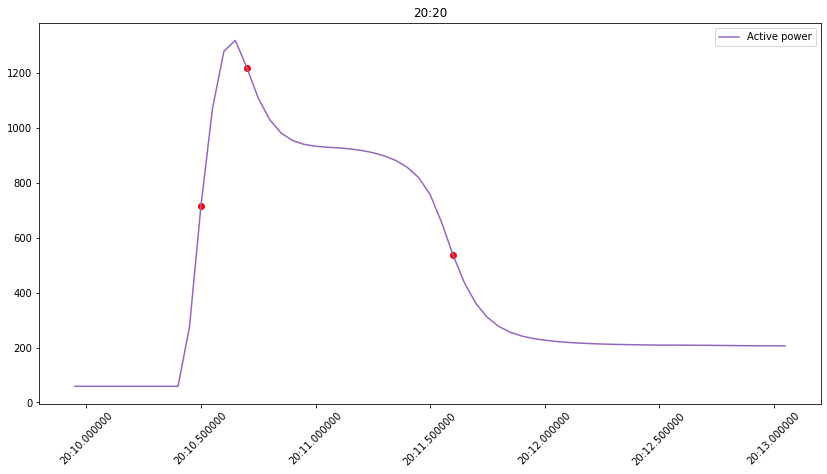

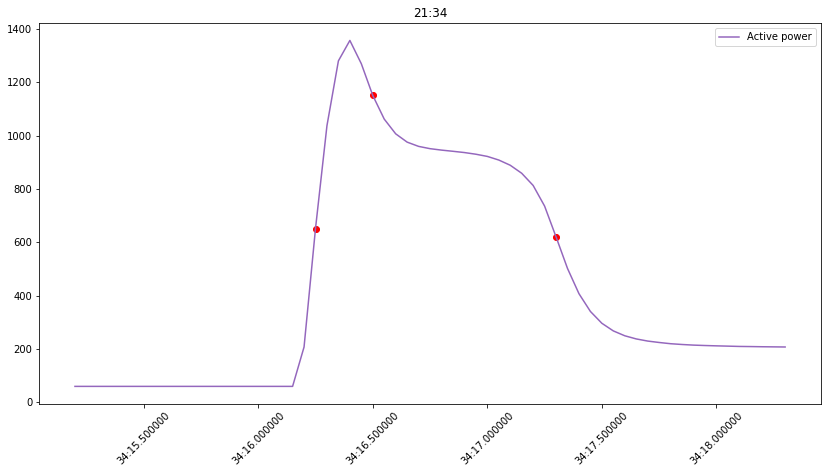

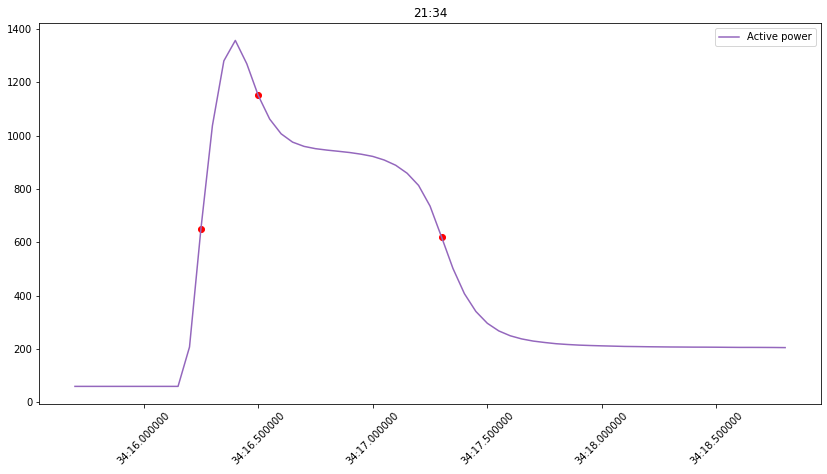

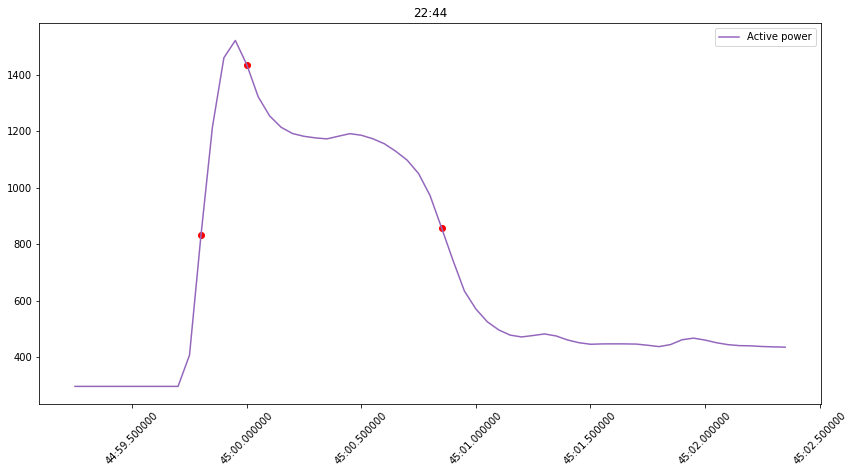

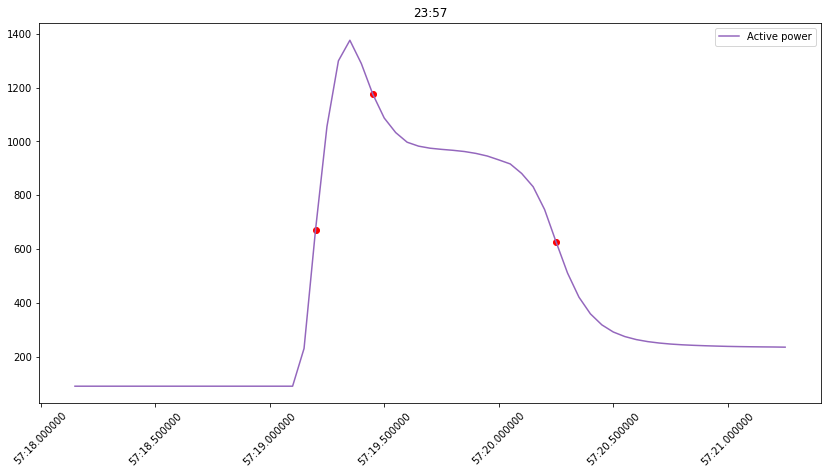

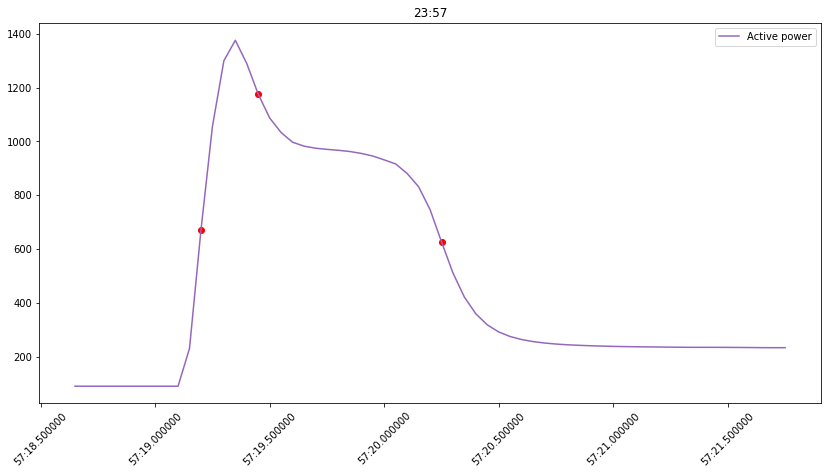

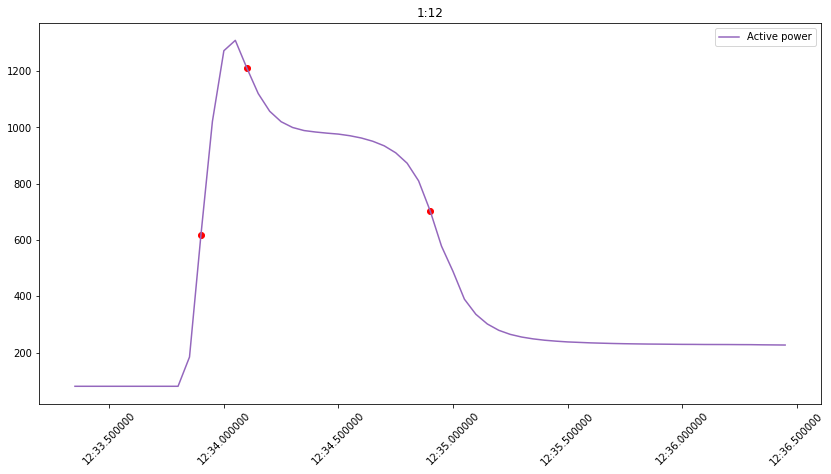

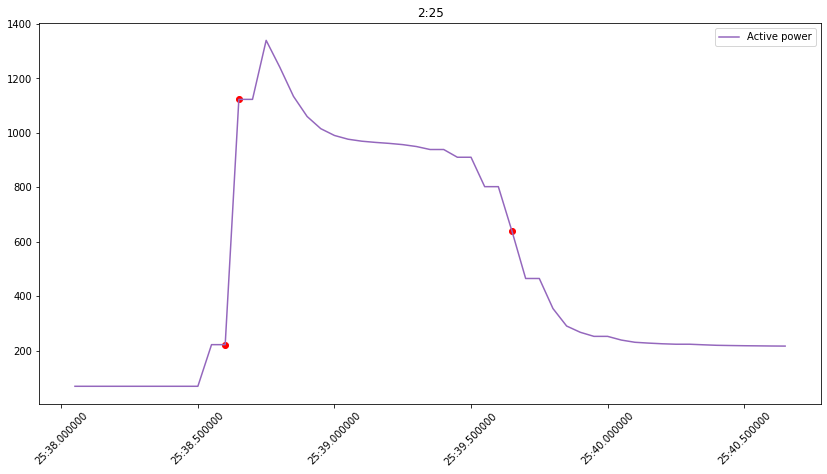

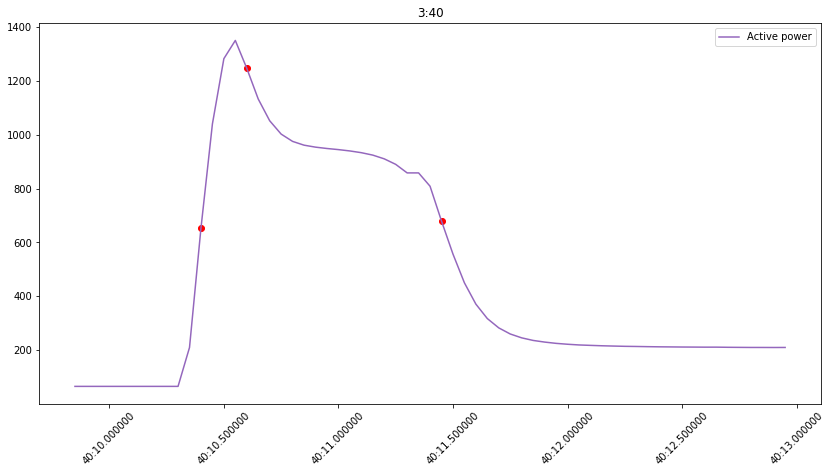

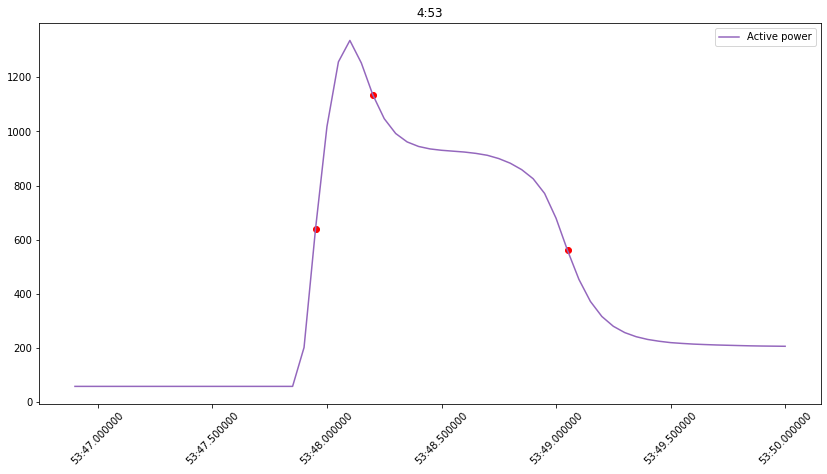

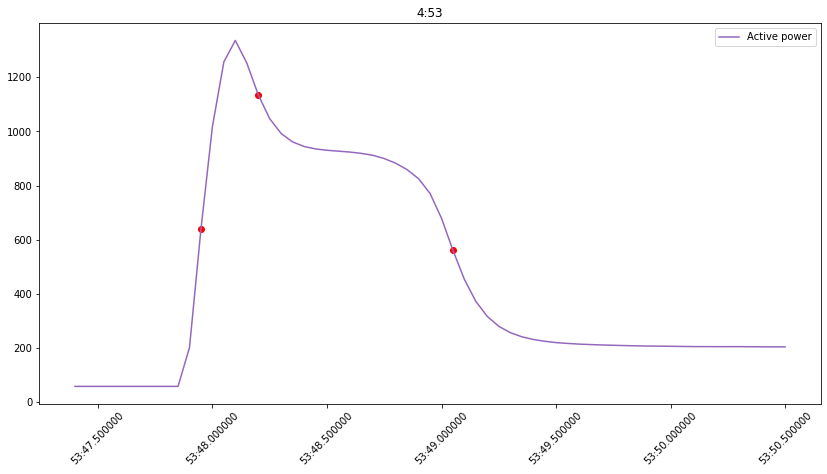

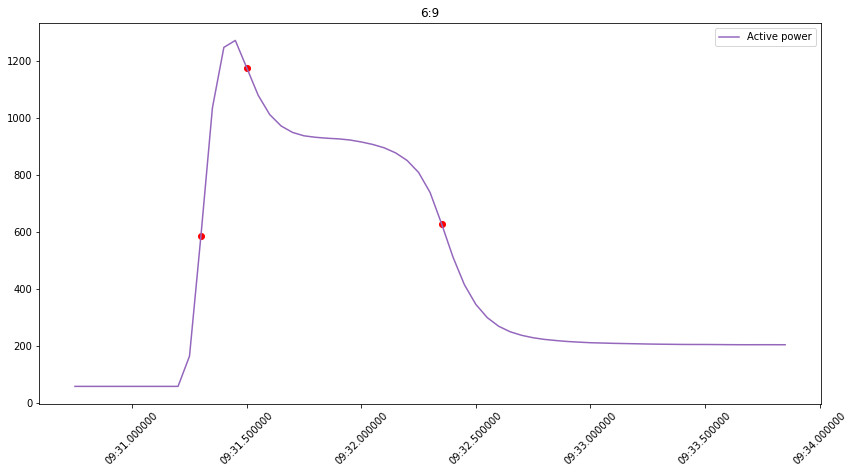

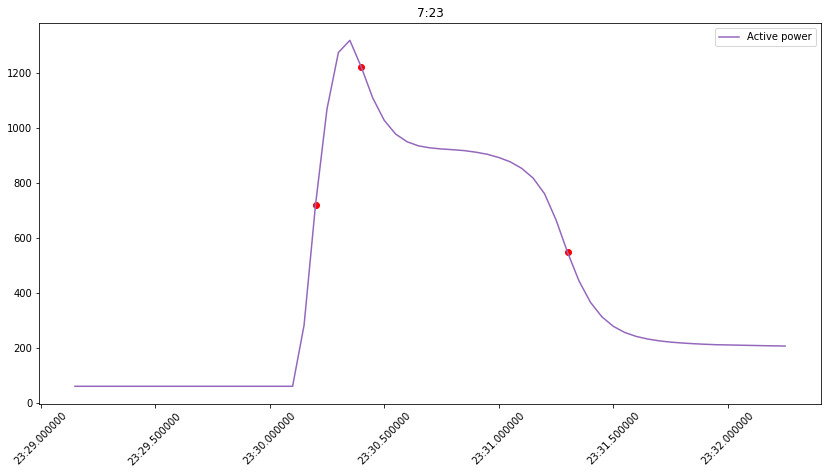

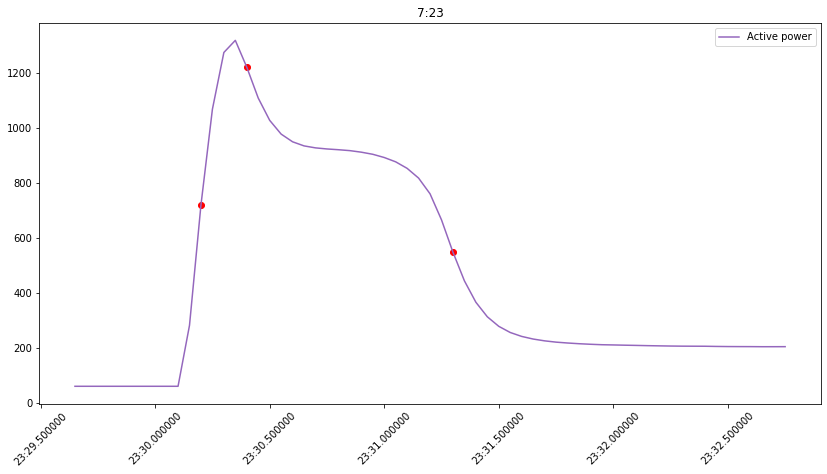

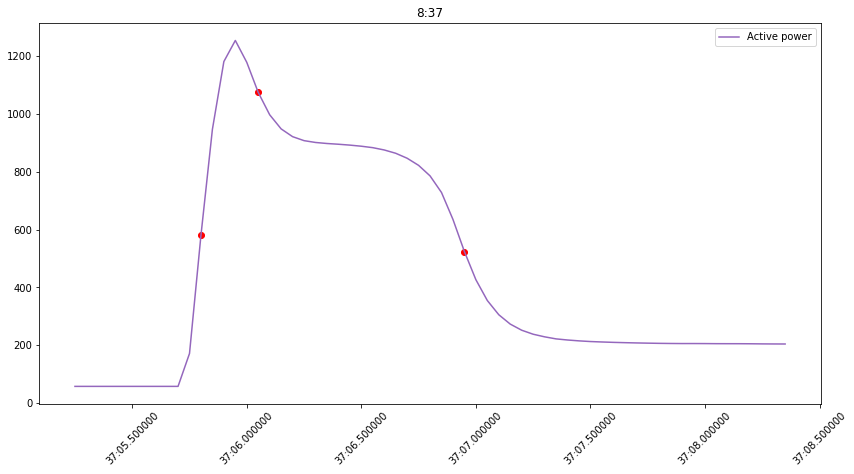

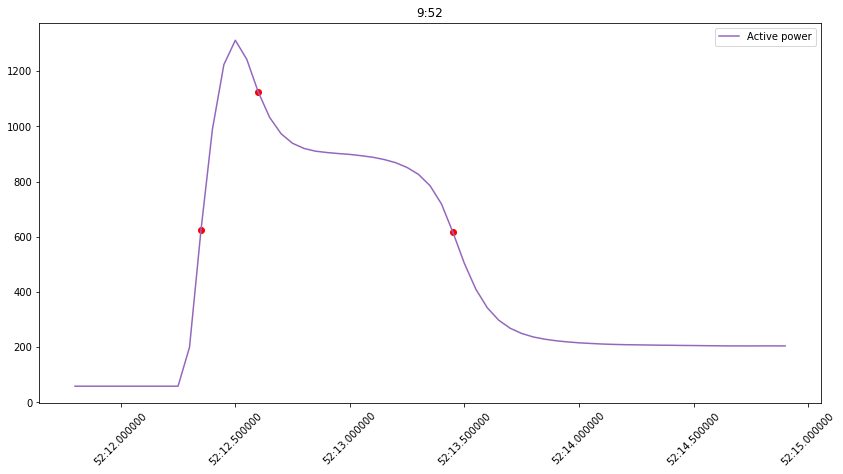

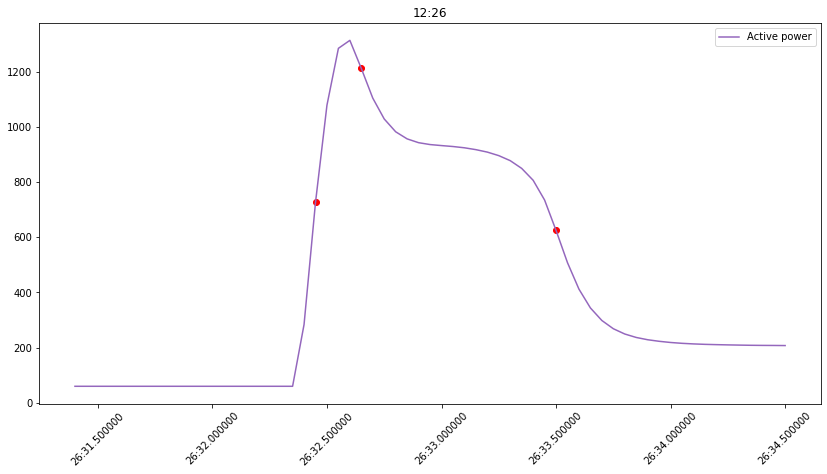

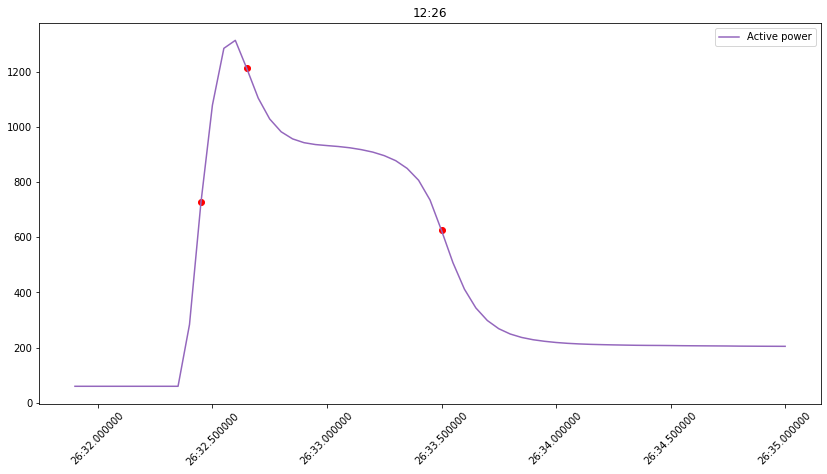

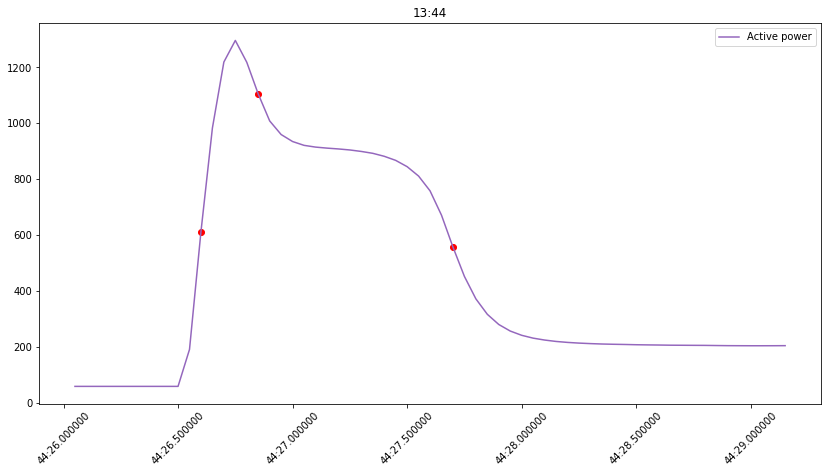

In [16]:
half=10
interval = 50
sec = 1000/interval
events = []
for name, tmp1 in df.groupby('ind'):
    winlen = tmp1.shape[0]
    startPoint = int(tmp1['dif'].iloc[1]/interval-sec)
    endPoint = int(tmp1['dif'].iloc[-1]/interval-sec)
    tmp1 = tmp1.resample('50ms').mean()
    tmp1['pwrA'] = tmp1['pwrA'].fillna(method='ffill')
    
    tmp1 = tmp1.iloc[startPoint:]
    tmp1 = tmp1.iloc[:-endPoint]
    for k in range(0, int(tmp1.shape[0]/half)-int(winlen/half)):
    
        tmp = pd.DataFrame([])
        tmp = tmp1.iloc[k*half:k*half+winlen].copy()
        k+=1

        tmp['extrema'] = 0
        tmp['der1'] = np.abs(tmp['pwrA'].shift(-1)-tmp['pwrA'].shift())

        tmp['extrema'] = tmp.iloc[argrelextrema(tmp['der1'].values, np.greater_equal,order=1)[0]]['der1']
        tmp.sort_values(by='extrema', ascending=False, inplace=True)
        tmp['extrema'][:3]=1
        tmp['extrema'][3:]=0

        tmp.sort_index(inplace=True)

        s=0
        n=0
        parts = []
        for j in range(0,tmp.shape[0]):
            if tmp['extrema'].iloc[j]<1:
                n += 1
                s += tmp['pwrA'].iloc[j]
            else:
                n += 1
                s += tmp['pwrA'].iloc[j]
                parts.append(s/n)
                n = 0
                s = 0


        if n!=0:
            parts.append(s/n)
            if len(parts)>3:
                pmin = 50
                pmax = 700
                rule1 = parts[3]-parts[0]>pmin
                rule2 = parts[3]-parts[0]<pmax
                rule3 = parts[2]-parts[0]>5*(parts[3]-parts[0])
                rule4 = parts[1]-parts[0]>1.1*(parts[2]-parts[0])

                if (rule1 and rule2 and rule3 and rule4):
                    
                    hour = str(tmp.index.hour[0])+':'+str(tmp.index.minute[0])
                    if not hour in events:
                        events.append(hour)
                    print('fridge ', hour)
                    fig, ax1 = plt.subplots(figsize=(14, 7.0))
                    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
                    ax1.plot(tmp.index, tmp['pwrA'], '-', color='tab:purple')
                    ax1.set_title(hour)
                    cl1 = tmp['extrema']==1
                    ax1.scatter(tmp.index[cl1], tmp['pwrA'][cl1], color='red') 
                    ax1.legend(['Active power'])
        
#         hour = str(tmp.index.hour[0])+' '+str(tmp.index.minute[0])
#         fig, ax1 = plt.subplots(figsize=(14, 7.0))
#         plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
#         ax1.plot(tmp.index, tmp['pwrA'], '-', color='tab:red')
#         ax1.set_title(hour)
# #             cl1 = tmp['extrema']==1
# #             ax1.scatter(tmp.index[cl1], tmp['pwrA'][cl1], color='blue') 
#         ax1.legend(['Active power'])
